In [1]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
a = 0.06
points_1 = []
points_2 = []
N = 5

In [3]:
def points(N):
    for i in range(N):
        x_1 = np.random.uniform(0, 1)
        y_1 = np.random.uniform(0, 1)
        points_1.append((x_1, y_1))
        alpha = np.random.uniform(0, 2 * np.pi)

        x_2 = x_1 + a * np.cos(alpha)
        y_2 = y_1 + a * np.sin(alpha)

        points_2.append((x_2, y_2))

In [4]:
points(N)

In [5]:
points_1

[(0.2944007719230576, 0.6187311535602519),
 (0.46481050459336704, 0.3507378532144605),
 (0.5891645103069995, 0.9716619962247524),
 (0.5510775448781278, 0.24561375871980118),
 (0.7478282915465538, 0.028357266880676857)]

In [6]:
points_2

[(0.35345850172101456, 0.6081394326844213),
 (0.45774625694933857, 0.4103205386626999),
 (0.5318107558373046, 0.9892843356900436),
 (0.6103506573141037, 0.23630257500599972),
 (0.7930337989757037, -0.011094755856732669)]

In [7]:
def plot_lines(N):
    for i in range(N):
        plt.plot([points_1[i][0], points_2[i][0]], [points_1[i][1], points_2[i][1]], 'r')
    plt.show()

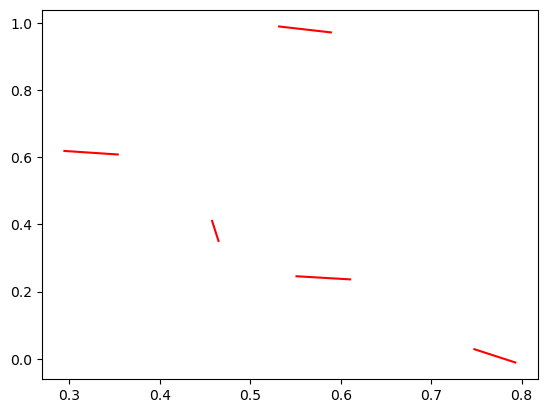

In [8]:
plot_lines(N)